# Object Detection Tasks
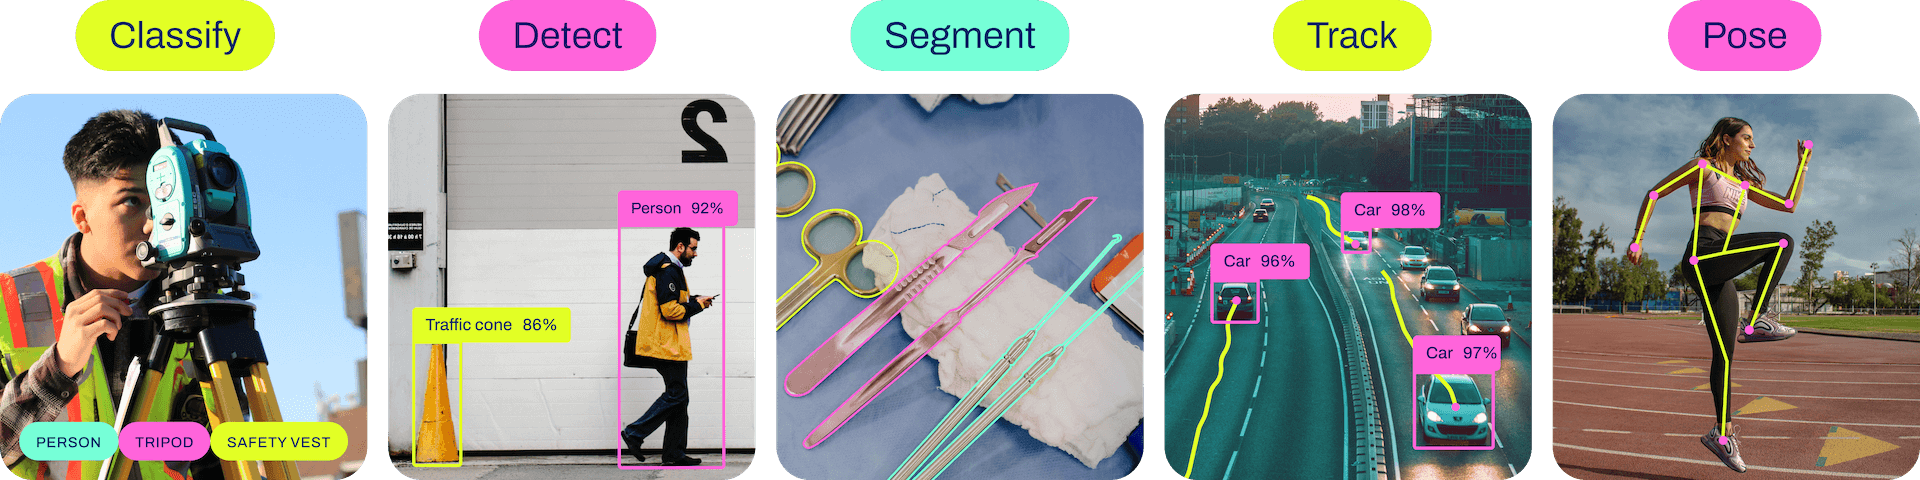

# Haar Cascades

In [1]:
# Check GPU availability
import torch

if torch.cuda.is_available():
    print("✅ GPU is available")
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("❌ GPU not available. Enable GPU from Runtime > Change runtime type")


✅ GPU is available
GPU Name: Tesla T4


In [2]:
# Install required libraries
!pip install -q ultralytics opencv-python matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.9 MB/s eta 0:00:00


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Load YOLOv8 pre-trained model
model = YOLO("yolov8n.pt")  # nano version (fast + light)


In [5]:
# Download a sample image
!wget -q https://ultralytics.com/images/bus.jpg -O input.jpg


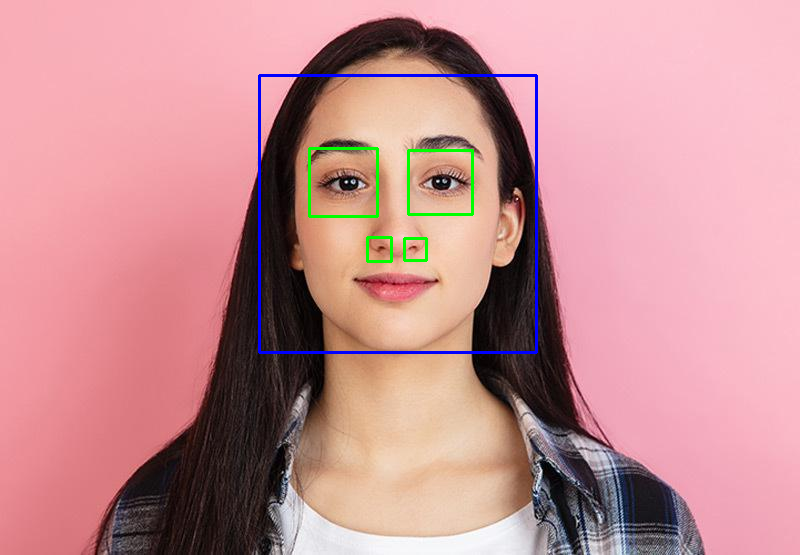

In [23]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
face_cascade= cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade =cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
img =cv2.imread("image.jpg")
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces =face_cascade.detectMultiScale(gray, 1.2, 1)
for (x,y,w,h) in faces:
  img= cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
  roi_gray =gray[y:y+h, x:x+w]
  roi_color= img[y:y+h, x:x+w]
  eyes =eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0),2)
cv2_imshow(img)

# Playing with Yolo v8

### 0. Setup

In [5]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


### 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [14]:
!yolo --help

WARNING ⚠️ argument '--help' does not require leading dashes '--', updating to 'help'.

    Arguments received: ['yolo', '--help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['segment', 'detect', 'obb', 'pose', 'classify']
                MODE (required) is one of ['train', 'track', 'val', 'export', 'benchmark', 'predict']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo26n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo26n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Validate a pretrained detection model a

In [15]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 48.4ms
Speed: 2.8ms preprocess, 48.4ms inference, 16.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


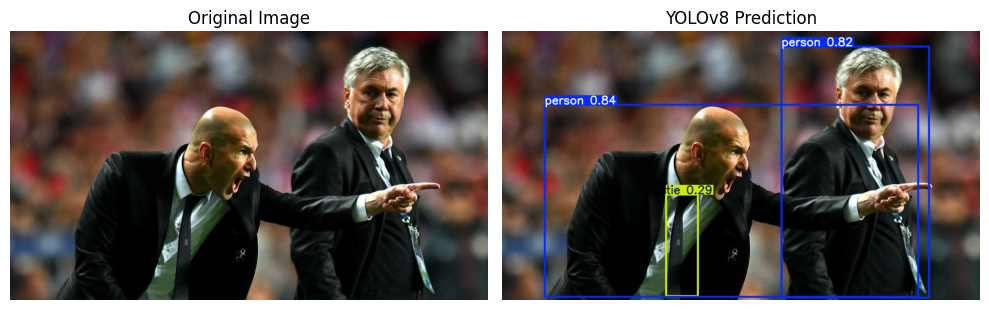

In [16]:
import matplotlib.pyplot as plt

img1 = cv2.imread("zidane.jpg")
img2 = cv2.imread("/content/runs/detect/predict/zidane.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
axes[0].imshow(img1_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off') # Hide axes

axes[1].imshow(img2_rgb)
axes[1].set_title("YOLOv8 Prediction")
axes[1].axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

# YOLO26

In [24]:
!yolo predict model=/content/yolo26n.pt source='https://ultralytics.com/images/bus.jpg'

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,408,932 parameters, 0 gradients, 5.4 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 58.8ms
Speed: 3.9ms preprocess, 58.8ms inference, 15.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


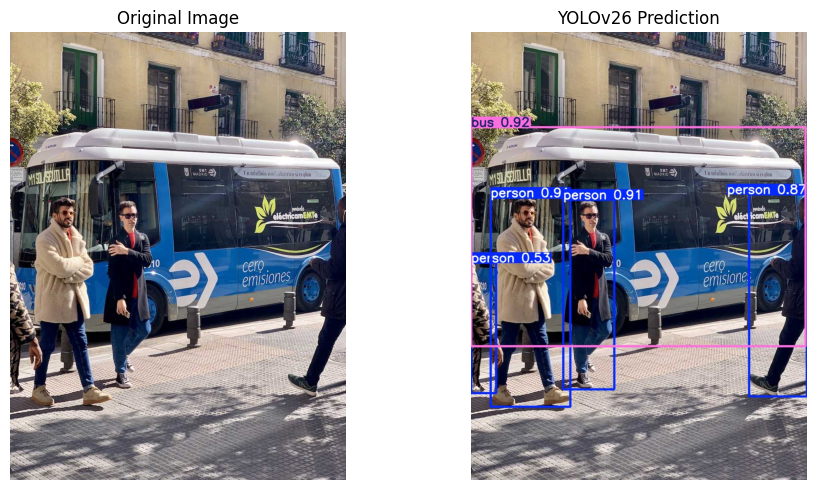

In [26]:
import matplotlib.pyplot as plt

img1 = cv2.imread("bus.jpg")
img2 = cv2.imread("/content/runs/detect/predict3/bus.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
axes[0].imshow(img1_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off') # Hide axes

axes[1].imshow(img2_rgb)
axes[1].set_title("YOLOv26 Prediction")
axes[1].axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

In [27]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo26n.pt")  # load an official model

# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 37.9ms
Speed: 2.5ms preprocess, 37.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


## Processing a video

In [29]:
! yolo predict model=yolo26n-seg.pt source='https://youtu.be/Qd6uWWd2Yoo?si=iVLGYuhZCv3okEs5' imgsz=320

Streaming output truncated to the last 5000 lines.
0: 192x320 (no detections), 19.5ms
0: 192x320 (no detections), 21.6ms
0: 192x320 (no detections), 21.6ms
0: 192x320 (no detections), 20.4ms
0: 192x320 (no detections), 20.1ms
0: 192x320 (no detections), 19.4ms
0: 192x320 (no detections), 22.7ms
0: 192x320 (no detections), 17.7ms
0: 192x320 (no detections), 21.6ms
0: 192x320 (no detections), 35.3ms
0: 192x320 (no detections), 17.9ms
0: 192x320 (no detections), 23.5ms
0: 192x320 (no detections), 23.3ms
0: 192x320 (no detections), 24.9ms
0: 192x320 (no detections), 23.3ms
0: 192x320 (no detections), 24.7ms
0: 192x320 (no detections), 17.6ms
0: 192x320 (no detections), 19.5ms
0: 192x320 (no detections), 21.1ms
0: 192x320 (no detections), 20.2ms
0: 192x320 (no detections), 24.4ms
0: 192x320 (no detections), 18.2ms
0: 192x320 (no detections), 17.6ms
0: 192x320 (no detections), 17.7ms
0: 192x320 (no detections), 19.0ms
0: 192x320 (no detections), 26.1ms
0: 192x320 (no detections), 20.3ms
0: 1

# Run this & take screenshots

In [33]:
from ultralytics import YOLO
import cv2
#from google.colab.patches import cv2_imshow
import numpy as np

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    while True:
        # Read a frame from the camera
        ret, frame = cap.read()

        # If frame is read correctly ret is True
        if not ret:
            print("Error: Can't receive frame (stream end?). Exiting ...")
            break

        # Perform object detection on the frame
        results = model(frame, verbose=False) # Set verbose=False to reduce output

        # Annotate the frame with detection results
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and destroy all windows
    cap.release()
    cv2.destroyAllWindows()

Error: Could not open camera.


In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📸 Capture Photo';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);

          stream.getTracks().forEach(track => track.stop());
          div.remove();

          return canvas.toDataURL('image/jpeg', quality);
        }
        takePhoto(%f);
    ''' % quality)

    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename


In [3]:
# Capture photo
photo_path = take_photo()
print("Image saved at:", photo_path)


<IPython.core.display.Javascript object>

Image saved at: photo.jpg


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

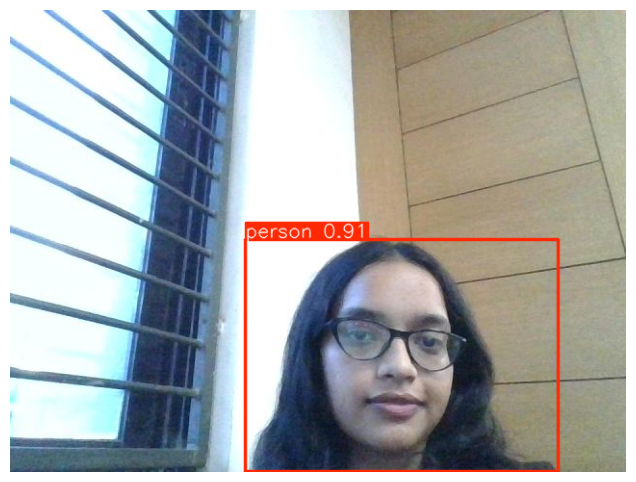

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLO model
model = YOLO("yolov8n.pt")

# Read captured image
img = cv2.imread(photo_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run detection
results = model(img_rgb, verbose=False)

# Show output
annotated = results[0].plot()
plt.figure(figsize=(8,6))
plt.imshow(annotated)
plt.axis("off")


In [7]:
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    print(model.names[cls], ":", round(conf, 2))


person : 0.91


In this assignment, a real-world computer vision system was implemented using a pre-trained YOLOv8 object detection model in Google Colab. The model was used to detect and classify objects from camera-captured images with bounding boxes and confidence scores. This task demonstrates practical application of deep learning-based object detection techniques and effective use of pre-trained models in a cloud environment. The assignment highlights how computer vision can be applied to real-world scenarios using modern AI tools.